## Pandas Primer 4
--------------

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns; sns.set()
import math
import zmq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import quandl as ql
ql.ApiConfig.api_key= "9Djob1GoNyL-pEK4-vEk"

<a id='cell50'></a>
## Financial Time series

In [2]:
AAPL = ql.get("WIKI/AAPL",start_date="2015-12-31",end_date="2019-12-31")
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2015-12-31 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         561 non-null    float64
 1   High         561 non-null    float64
 2   Low          561 non-null    float64
 3   Close        561 non-null    float64
 4   Volume       561 non-null    float64
 5   Ex-Dividend  561 non-null    float64
 6   Split Ratio  561 non-null    float64
 7   Adj. Open    561 non-null    float64
 8   Adj. High    561 non-null    float64
 9   Adj. Low     561 non-null    float64
 10  Adj. Close   561 non-null    float64
 11  Adj. Volume  561 non-null    float64
dtypes: float64(12)
memory usage: 57.0 KB


In [3]:
AAPL.tail()

Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2018-03-21  175.04  175.09  171.26  171.270  35247358.0          0.0   
2018-03-22  170.00  172.68  168.60  168.845  41051076.0          0.0   
2018-03-23  168.39  169.92  164.94  164.940  40248954.0          0.0   
2018-03-26  168.07  173.10  166.44  172.770  36272617.0          0.0   
2018-03-27  173.68  175.15  166.92  168.340  38962839.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0     175.04     175.09    171.26     171.270   
2018-03-22          1.0     170.00     172.68    168.60     168.845   
2018-03-23          1.0     168.39     169.92    164.94     164.940   
2018-03-26          1.0     168.07     173.10    166.44     172.770   
2018-03-27          1.0     173.68     175.15    166.92     168.340   

            Adj. Volume  
Date                     
2018-03-21   35247358.0  
2018-03-22   41051076.0  
2018-03-23   40248954.0  
2018-03-26   36272617.0  
2018-03-27   38962839.0

<a id='cell51'></a>

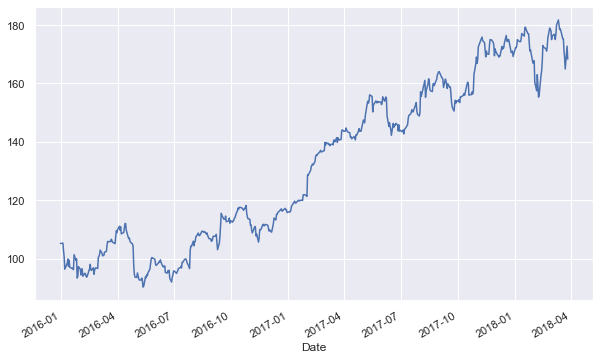

In [4]:
AAPL['Close'].plot(figsize=(10,6));

<a id='cell52'></a>

In [5]:
AAPL['42'] = AAPL['Close'].rolling(window=42).mean()
AAPL['252'] = AAPL['Close'].rolling(window=252).mean()

In [6]:
AAPL[['Close', '42', '252']].tail()

Close          42         252
Date                                       
2018-03-21  171.270  171.771310  159.534975
2018-03-22  168.845  171.577143  159.643645
2018-03-23  164.940  171.289048  159.743248
2018-03-26  172.770  171.254524  159.867653
2018-03-27  168.340  171.188571  159.976463

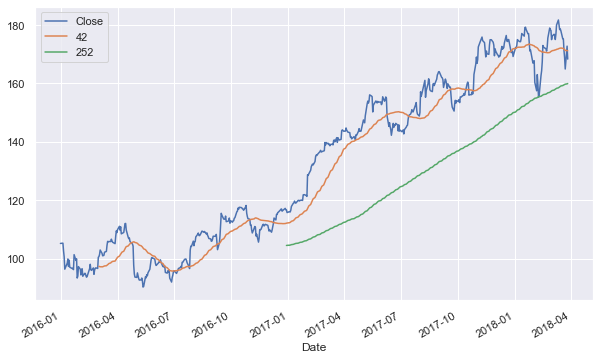

In [7]:
AAPL[['Close', '42', '252']].plot(figsize=(10, 6));

<a id='cell53'></a>

In [8]:
AAPL['Ret_Loop'] = 0.0
log_rets = []
for i in range(1, len(AAPL)):
    log_rets.append(math.log(AAPL['Close'][i] /
                        AAPL['Close'][i - 1]))
AAPL['Ret_Loop'].loc[1:] = log_rets

C:\Users\maria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
AAPL[['Close', 'Ret_Loop']].tail()

Close  Ret_Loop
Date                         
2018-03-21  171.270 -0.022915
2018-03-22  168.845 -0.014260
2018-03-23  164.940 -0.023399
2018-03-26  172.770  0.046379
2018-03-27  168.340 -0.025975

<a id='cell54'></a>

In [10]:
AAPL['Return'] = np.log(AAPL['Close'] / AAPL['Close'].shift(1))

In [11]:
AAPL[['Close','Return']].tail()

Close    Return
Date                         
2018-03-21  171.270 -0.022915
2018-03-22  168.845 -0.014260
2018-03-23  164.940 -0.023399
2018-03-26  172.770  0.046379
2018-03-27  168.340 -0.025975

In [12]:
# del DAX['Ret_Loop']

<a id='cell55'></a>

In [13]:
AAPL['Mov_vol'] = pd.Series.rolling(AAPL['Return'], 
                                window = 252).std() * math.sqrt(252) 
# moving annualized volatility

<a id='cell56'></a>

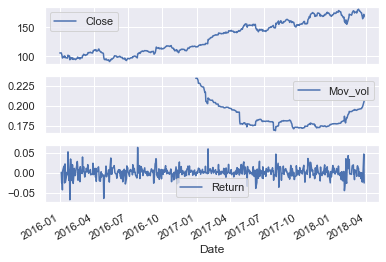

In [14]:
AAPL[['Close','Mov_vol','Return']].plot(subplots=True , style ='b');

In [15]:
regre= ql.get(['WIKI/AAPL.11','WIKI/MSFT.11'], rows=300)

In [16]:
regre.columns

Index(['WIKI/AAPL - Adj. Close', 'WIKI/MSFT - Adj. Close'], dtype='object')

In [17]:
regre

WIKI/AAPL - Adj. Close  WIKI/MSFT - Adj. Close
Date                                                      
2017-01-13              117.569682                     NaN
2017-01-17              118.517825               61.170229
2017-01-18              118.507948               61.140882
2017-01-19              118.300542               60.945231
2017-01-20              118.517825               61.375662
...                            ...                     ...
2018-03-21              171.270000               92.480000
2018-03-22              168.845000               89.790000
2018-03-23              164.940000               87.180000
2018-03-26              172.770000               93.780000
2018-03-27              168.340000               89.470000

[301 rows x 2 columns]

In [18]:
regre.rename(columns= {'WIKI/AAPL - Adj. Close': 'AAPL','WIKI/MSFT - Adj. Close': 'MSFT'},inplace=True)

<a id='cell57'></a>

In [19]:
regre

AAPL       MSFT
Date                             
2017-01-13  117.569682        NaN
2017-01-17  118.517825  61.170229
2017-01-18  118.507948  61.140882
2017-01-19  118.300542  60.945231
2017-01-20  118.517825  61.375662
...                ...        ...
2018-03-21  171.270000  92.480000
2018-03-22  168.845000  89.790000
2018-03-23  164.940000  87.180000
2018-03-26  172.770000  93.780000
2018-03-27  168.340000  89.470000

[301 rows x 2 columns]

In [20]:
regre.dropna(inplace=True)

In [21]:
xdat = regre['AAPL']
ydat = regre['MSFT']
exo = sm.add_constant(xdat)
model = sm.OLS(ydat , xdat)
results = model.fit()
print(results.summary())
#model = pd.ols(y = ydat , x = xdat)
#model

                                 OLS Regression Results                                
Dep. Variable:                   MSFT   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          7.654e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        12:13:06   Log-Likelihood:                         -889.97
No. Observations:                 299   AIC:                                      1782.
Df Residuals:                     298   BIC:                                      1786.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
results.params[0]

0.48762627643563944

In [23]:
results.tvalues

AAPL    276.653914
dtype: float64

<a id='cell58'></a>
<a id='cell59'></a>

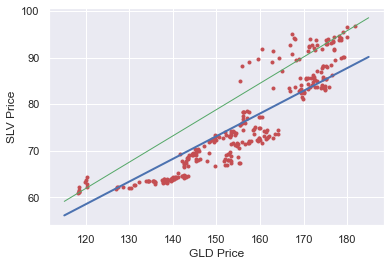

In [24]:
plt.plot(xdat,ydat , 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1]) 
y = np.linspace(ax[2],ax[3])
plt.plot(x, results.params[0] * x,'b', lw=2)
plt.plot(x,y,'g',lw=1)
plt.grid(True)
plt.axis('tight')
plt.xlabel('GLD Price')
plt.ylabel('SLV Price');

In [25]:
ax[0] # min value x axis

115.129569097879

In [26]:
ax[1] # max value x axis

184.890972900101

In [27]:
ax[2] # min value y axis 

59.153992224896896

In [28]:
ax[3] # max value y axis

98.5612384654811

<a id='cell60'></a>

In [29]:
regre.corr()

AAPL      MSFT
AAPL  1.000000  0.906317
MSFT  0.906317  1.000000

<a id='cell61'></a>
## Hierarchical Indexing

In [30]:
datus = pd.Series(np.random.randn(10), 
                  index =[['a','a','a','b','b','b','c','c','d','d'],
                         [1,2,3,1,2,3,1,2,2,3],[4,5,6,4,5,6,4,5,5,6]])
datus

a  1  4   -1.567603
   2  5    0.401644
   3  6    0.839671
b  1  4    2.561497
   2  5    1.063035
   3  6    0.834165
c  1  4    0.452158
   2  5    0.669825
d  2  5   -0.317911
   3  6   -0.669648
dtype: float64

In [31]:
datus['b':'c']

b  1  4    2.561497
   2  5    1.063035
   3  6    0.834165
c  1  4    0.452158
   2  5    0.669825
dtype: float64

In [32]:
datus[:, 2]

a  5    0.401644
b  5    1.063035
c  5    0.669825
d  5   -0.317911
dtype: float64

<a id='cell62'></a>

In [33]:
datus.unstack(level = -0)

a         b         c         d
1 4 -1.567603  2.561497  0.452158       NaN
2 5  0.401644  1.063035  0.669825 -0.317911
3 6  0.839671  0.834165       NaN -0.669648

In [34]:
datus.unstack().stack()

a  1  4   -1.567603
   2  5    0.401644
   3  6    0.839671
b  1  4    2.561497
   2  5    1.063035
   3  6    0.834165
c  1  4    0.452158
   2  5    0.669825
d  2  5   -0.317911
   3  6   -0.669648
dtype: float64

In [35]:
datus.index.names = ['key1','key2','key3']

In [36]:
datus.swaplevel('key2','key3')

key1  key3  key2
a     4     1      -1.567603
      5     2       0.401644
      6     3       0.839671
b     4     1       2.561497
      5     2       1.063035
      6     3       0.834165
c     4     1       0.452158
      5     2       0.669825
d     5     2      -0.317911
      6     3      -0.669648
dtype: float64

<a id='cell63'></a>